# Main differences with rpnpy
## Getting the file information (without data fstprm, with data fstluk)
### Rpnpy - metadata is in a list(dict)

In [1]:
# put this at the beginning of a vscode notebook
import os
import sys
import pathlib
# make rpnpy visible
os.environ['LD_LIBRARY_PATH'] = '/fs/ssm/eccc/mrd/rpn/libs/19.6.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199:/fs/ssm/eccc/mrd/rpn/vgrid/6.5.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199:/fs/ssm/eccc/mrd/rpn/utils/19.6.0/ubuntu-18.04-skylake-64/lib:/fs/ssm/eccc/mrd/rpn/utils/19.6.0/ubuntu-18.04-amd64-64/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/ucx/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/sharp/lib:/fs/ssm/hpco/exp/openmpi/hpcx-core-2.4.0/hpcx-core_2.4.0-gcc-mofed-4.6-1_ubuntu-18.04-amd64-64/x/hcoll/lib:/fs/ssm/hpco/exp/openmpi/openmpi-3.1.2--hpcx-2.4.0-mofed-4.6--intel-19.0.3.199/ubuntu-18.04-amd64-64/lib:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/compiler/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/ipp/lib/intel64:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/mkl/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/tbb/lib/intel64/gcc4.7:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/debugger_2019/libipt/intel64/lib:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/daal/lib/intel64_lin:/fs/ssm/main/opt/intelcomp/intelpsxe-cluster-19.0.3.199/intelpsxe-cluster_19.0.3.199_multi/compilers_and_libraries_2019.3.199/linux/daal/../tbb/lib/intel64_lin/gcc4.4:/opt/mellanox/mxm/lib'
sys.path.append('/fs/ssm/eccc/mrd/rpn/MIG/ENV/d/rpnpy/rpnpy_2.1.2/rpnpy_2.1.2_all/lib')
sys.path.append('/fs/ssm/eccc/mrd/rpn/libs/19.6.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199')
sys.path.append('/fs/ssm/eccc/mrd/rpn/vgrid/6.5.0/ubuntu-18.04-skylake-64/lib/ubuntu-18.04-skylake-64/intel-19.0.3.199')
sys.path.append('/fs/ssm/eccc/cmd/cmda/libs/19.6.0/intel-19.0.3.199/ubuntu-18.04-skylake-64/lib')
sys.path.append('/fs/ssm/eccc/mrd/rpn/utils/19.6.0/env-python_1.3.0_all/share/Python/PythonAllRevs')
# make ci_fstcomp visible
sys.path.append('/fs/ssm/eccc/cmd/cmds/apps/ci_fstcomp/1.0.8/all/lib/python')
sys.path.append('/home/zak000/src/fstpy')

In [2]:
import rpnpy.librmn.all as rmn
unit = rmn.fstopenall('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std')
keys = rmn.fstinl(unit)
records = [rmn.fstprm(k) for k in keys]
rmn.fstcloseall(unit)
for rec in records[0:1]:
    print(rec,end='')

{'key': 1, 'shape': (1108, 1082, 1), 'dateo': 442998800, 'datev': 443004200, 'deet': 300, 'npas': 72, 'ni': 1108, 'nj': 1082, 'nk': 1, 'nbits': 16, 'datyp': 134, 'ip1': 95529009, 'ip2': 6, 'ip3': 0, 'typvar': 'P ', 'nomvar': 'HU  ', 'etiket': 'R1_V710_N   ', 'grtyp': 'Z', 'ig1': 33792, 'ig2': 77761, 'ig3': 1, 'ig4': 0, 'swa': 2335, 'lng': 216286, 'dltf': 0, 'ubc': 0, 'xtra1': 443004200, 'xtra2': 0, 'xtra3': 0}

## Getting the file information (with data as dask lazy arrays, decoded attributes)
### Fstpy - data is in a dataframe

In [3]:
import fstpy
# setup your file to read
df = fstpy.StandardFileReader('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', decode_metadata=True).to_pandas()
df[['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2', 'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3', 'ig4', 'datev', 'grid']]

#key – Positioning information to the record. Obtained with fstinf or fstinl.
#dateo – date of origin (date time stamp) Cannot change dateo and datev.
#datev – date of validity (date time stamp) Cannot change dateo and datev.
#deet – Length of a time step in seconds datev constant unless keep_dateo
#npas – time step number datev constant unless keep_dateo
#ni – first dimension of the data field
#nj – second dimension of the data field
#nk – third dimension of the data field
#nbits – number of bits kept for the elements of the field
#datyp – data type of the elements
#ip1 – vertical level
#ip2 – forecast hour
#ip3 – user defined identifier
#typvar – type of field (forecast, analysis, climatology)
#nomvar – variable name
#etiket – label
#grtyp – type of geographical projection
#ig1 – first grid descriptor
#ig2 – second grid descriptor
#ig3 – third grid descriptor
#ig4 – fourth grid descriptor/
#keep_dateo (bool) – By default datev is kept constant unless dateo is specified or keep_dateo=True (keep_dateo must be False is datev is provided).
#verion 2.0.rc1, this function can be called with a rec meta (From) –
#keylist instead of a simple key number (or) –
#rec (dict) – dictionary where key = rec[‘key’]
#keylist (list) – list of keys for records to edit

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,PN,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
1,QC,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,TD,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
3,ES,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,HR,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,>>,X,R1_V710_N,1107,1,1,442998800,50460,53326,4,...,0,5,32,E,1470,560,54400,46560,442998800,5046053326
1870,^^,X,R1_V710_N,1,1081,1,442998800,50460,53326,4,...,0,5,32,E,1470,560,54400,46560,442998800,5046053326
1871,>>,X,R1_V710_N,1104,1,1,442998800,35132,56748,1,...,0,5,32,E,1470,560,54400,46560,442998800,3513256748
1872,^^,X,R1_V710_N,1,1078,1,442998800,35132,56748,1,...,0,5,32,E,1470,560,54400,46560,442998800,3513256748


### Already decoded attributes

In [4]:
# df = data frame for storing data tables and list of vectors of equal length
# Question: Comment ca crée 3 differentes colonnes pour la colonne etiket
# Question: Comment certaines colonnes sont decoder ou ont apparu (date_of_observation, date_of_validity,level etc...)?

df[['nomvar', 'typvar', 'run', 'label', 'implementation', 'ni', 'nj', 'nk', 'date_of_observation', 'date_of_validity', 'level', 'ip1_pkind', 'data_type_str', 'nbits', 'unit', 'description', 'vctype']]

,nomvar,typvar,run,label,implementation,ni,nj,nk,date_of_observation,date_of_validity,level,ip1_pkind,data_type_str,nbits,unit,description,vctype
0,PN,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.0,mb,f,12,millibar,Sea Level Pressure,HYBRID_5005
1,QC,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,1.5,M,f,16,kilogram_per_kilogram,Mixing ratio of total condensate (Sundquivst),HYBRID_5005
2,TD,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,1.5,M,f,12,celsius,Dew Point Temperature,HYBRID_5005
3,ES,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,1.5,M,f,16,celsius,Dew point depression,HYBRID_5005
4,HR,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,1.5,M,f,12,scalar,Relative humidity,HYBRID_5005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,>>,X,R1,_V710_,N,1107,1,1,2020-07-14 12:00:00,2020-07-14 12:00:00,50460.0,,E,32,scalar,Horizontal position in a Y or Z grid,UNKNOWN
1870,^^,X,R1,_V710_,N,1,1081,1,2020-07-14 12:00:00,2020-07-14 12:00:00,50460.0,,E,32,scalar,Vertical position in a Y or Z grid,UNKNOWN
1871,>>,X,R1,_V710_,N,1104,1,1,2020-07-14 12:00:00,2020-07-14 12:00:00,35132.0,,E,32,scalar,Horizontal position in a Y or Z grid,UNKNOWN
1872,^^,X,R1,_V710_,N,1,1078,1,2020-07-14 12:00:00,2020-07-14 12:00:00,35132.0,,E,32,scalar,Vertical position in a Y or Z grid,UNKNOWN


## Writing to file
### Rpnpy

In [5]:
import rpnpy.librmn.all as rmn
from os import getenv

# setup our output file

# returns the value of the environment variable key if it exists otherwise returns the default value.
# Get the value of 'USER'
key = "USER"
user = getenv(key)
out_file = f'/tmp/{user}/TT.std'
#je delete le file qui a deja ete utilise precedemment
fstpy.delete_file(out_file)

# Open existing file in Rear Only mode(FST_RO)
unit1 = rmn.fstopenall('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', rmn.FST_RO)
# Open existing file in Rear/Write mode(FST_RW)
unit2 = rmn.fstopenall(out_file, rmn.FST_RW)
#Question: Pourquoi c pas keys1 = rmn.fstinl(unit1, nomvar='TT')
# et keys2 = rmn.fstinl(unit2, nomvar='TT')

## Find all record named TT
keys = rmn.fstinl(unit, nomvar='TT')
for k in keys:
    # read it meta + data
    r = rmn.fstluk(k)
    # Write the record specifying data and meta together in the output file
    rmn.fstecr(unit2,r)
# Properly close files, important when writing to avoid corrupted files
rmn.fstcloseall(unit1)
rmn.fstcloseall(unit2)

Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Write(998) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Write(998) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Write(998) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      

### Fstpy - no unit management

In [6]:
# setup our output file
out_file = f'/tmp/{user}/TT_fstpy.std'
fstpy.delete_file(out_file)
# read
df = fstpy.StandardFileReader('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std', query='nomvar=="TT"').to_pandas()
# write
fstpy.StandardFileWriter(out_file, df).to_fst()

/home/sbf000/fstpy/fstpy/dataframe_utils.py:470: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  p0_fields_df = pd.concat(df_list, ignore_index=True)
/home/sbf000/.conda/envs/py39/lib/python3.9/site-packages/dask/array/core.py:1711: FutureWarning: The `numpy.intersect1d` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(
/home/sbf000/fstpy/fstpy/dataframe_utils.py:321: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  toctoc_fields_df = pd.concat(df_list, ignore_index=True)


Read(999) !!   X  R1_V710_N           3     175     1  000000000        33792     77761         0        0        0  E 64  X  5005     0   300  1500
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300

/home/sbf000/fstpy/fstpy/dataframe_utils.py:111: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_df = pd.concat([grid_deformation_fields_df, p0_fields_df,


Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     94531326         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     94521294         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     96099063         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     96042336         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     94553255         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     94541966         6         0      300       72  f 16  Z 33792 77761     1     0
Read(999) TT   P  R1_V710_N        1108    1082     1  442998800     94803839         6         0      300

# Pandas
## Data anlysis

In [7]:
import datetime
import glob
from tqdm import tqdm
import pandas as pd

CMCGRIDF  = '/space/hall5/sitestore/eccc/prod/hubs/gridpt/dbase'
fdate     = datetime.date.today().strftime('%Y%m%d') + '**'
# Join various path components
pattern  = os.path.join(CMCGRIDF, 'prog', 'regeta', fdate)
# Return a list of paths matching a pathname pattern
files = glob.glob(pattern)
# Creates a dataframe of all non deleted records in an FST file, does not include data 'd'

# get_basic_dataframe(path)
# :param path: path of file to load
# :type path: str
# :return: dataframe of all non deleted records in an FST file
# :rtype: pd.DataFrame

#for f in tqdm(files) == progress bar
df_list = [fstpy.get_basic_dataframe(f) for f in tqdm(files)]

# create a dataframe of all files
#Concatenate df_list along a particular axis with optional set logic along the other axes.
df = pd.concat(df_list, ignore_index=True)
# Adds the grid column to the dataframe.
# The grid column is a simple identifier composed of ip1+ip2 or ig1+ig2 
#ip1 – vertical level
#ip2 – forecast hour
#ig1 – first grid descriptor
#ig2 – second grid descriptor
df = fstpy.add_grid_column(df)
df = fstpy.add_columns(df,['ip_info', 'datev'])
#Access a group of rows and columns by label(s) or a boolean array.
tt_surface_df = df.loc[(df.nomvar=='TT') & (df.surface==True)] # ???

# Sort date 0f validity by labels and reset the indexes of the objects sorted
tt_surface_df = tt_surface_df.sort_values('date_of_validity').reset_index(drop=True)
tt_surface_df # ???

100%|██████████| 340/340 [00:11<00:00, 30.29it/s]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,ip2_kind,ip2_pkind,ip3_dec,ip3_kind,ip3_pkind,surface,follow_topography,ascending,interval,vctype
0,TT,P,R1_V810_N,1102,1076,1,465387200,12000,0,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
1,TT,P,R1_V810_N,1102,1076,1,465387200,12000,1,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
2,TT,P,R1_V810_N,1102,1076,1,465387200,12000,2,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
3,TT,P,R1_V810_N,1102,1076,1,465387200,12000,3,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
4,TT,P,R1_V810_N,1102,1076,1,465387200,12000,4,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,TT,P,R1_V810_N,1102,1076,1,465392600,12000,80,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
166,TT,P,R1_V810_N,1102,1076,1,465392600,12000,81,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
167,TT,P,R1_V810_N,1102,1076,1,465392600,12000,82,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002
168,TT,P,R1_V810_N,1102,1076,1,465392600,12000,83,0,...,10,H,0.0,100,,True,True,False,None,ETA_1002


## reorganize the data (reads all the TT)

In [8]:
import dask.array as da
tt_surface_df = fstpy.add_dask_column(tt_surface_df)

array_3d = da.stack(tt_surface_df.d)
column = array_3d[:,0,0]
column = column.compute()
orig_tt_df = pd.DataFrame({'TT [C]':column,'date_of_validity':tt_surface_df.date_of_validity})
tt_df = orig_tt_df.set_index('date_of_validity')

Read(998) TT   P  R1_V810_N        1102    1076     1  465387200        12000         0         0      300        0  f 16  Z 86086 77806     1     0
Read(997) TT   P  R1_V810_N        1102    1076     1  465387200        12000         1         0      300       12  f 16  Z 86086 77806     1     0
Read(996) TT   P  R1_V810_N        1102    1076     1  465387200        12000         2         0      300       24  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200        12000         3         0      300       36  f 16  Z 86086 77806     1     0
Read(994) TT   P  R1_V810_N        1102    1076     1  465387200        12000         4         0      300       48  f 16  Z 86086 77806     1     0
Read(993) TT   P  R1_V810_N        1102    1076     1  465387200        12000         5         0      300       60  f 16  Z 86086 77806     1     0
Read(992) TT   P  R1_V810_N        1102    1076     1  465387200        12000         6         0      300

## describe the data

In [9]:
print(tt_df.describe())
tt_df['mean'] = tt_df['TT [C]'].mean()
tt_df['min'] = tt_df['TT [C]'].min()
tt_df['max'] = tt_df['TT [C]'].max()
tt_df

           TT [C]
count  170.000000
mean    27.389275
std      0.615171
min     25.273750
25%     27.185270
50%     27.608379
75%     27.768758
max     28.273144


,TT [C],mean,min,max
date_of_validity,,,,
2023-05-17 00:00:00,28.171906,27.389275,25.27375,28.273144
2023-05-17 01:00:00,28.039486,27.389275,25.27375,28.273144
2023-05-17 02:00:00,27.987972,27.389275,25.27375,28.273144
2023-05-17 03:00:00,28.111450,27.389275,25.27375,28.273144
2023-05-17 04:00:00,27.244888,27.389275,25.27375,28.273144
...,...,...,...,...
2023-05-20 14:00:00,26.547771,27.389275,25.27375,28.273144
2023-05-20 15:00:00,27.607445,27.389275,25.27375,28.273144
2023-05-20 16:00:00,27.636929,27.389275,25.27375,28.273144


<AxesSubplot:xlabel='date_of_validity'>

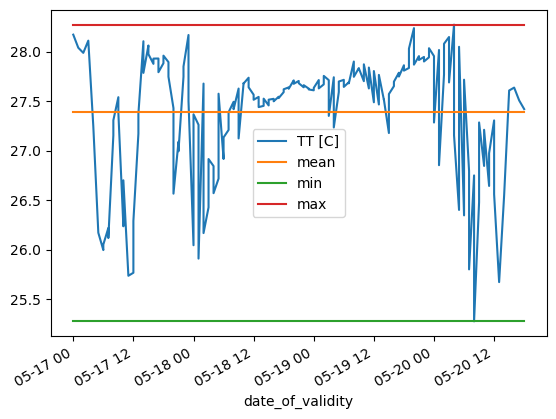

In [10]:
tt_df.plot()

## change the plot

<AxesSubplot:xlabel='TT [C]'>

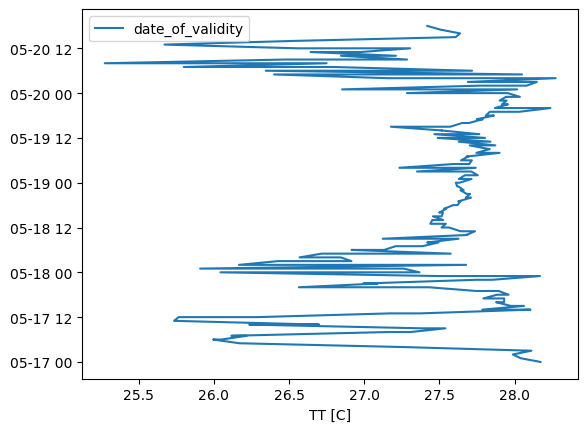

In [11]:
orig_tt_df.set_index('TT [C]').plot()

## TT profile

Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95294295         6         0      300

<AxesSubplot:xlabel='TT'>

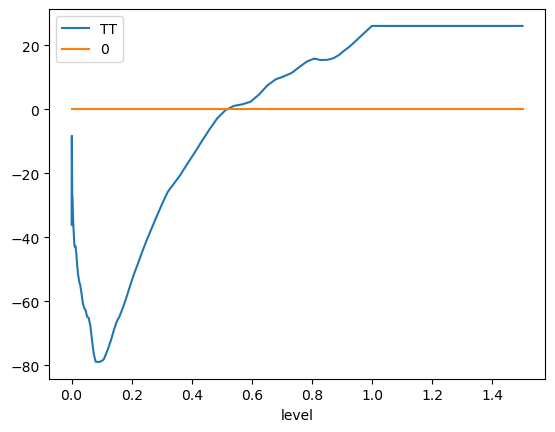

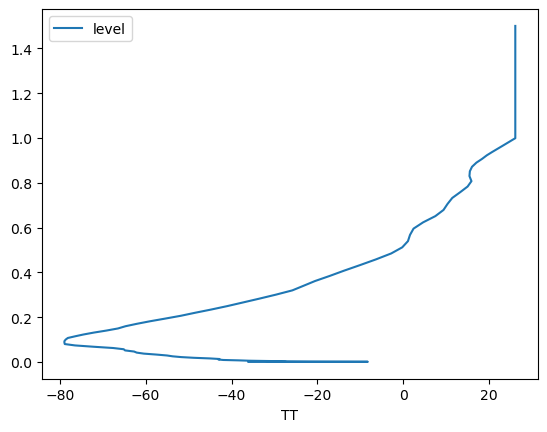

In [12]:
import dask.array as da
import fstpy
import numpy as np
import pandas as pd
path = '/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std'

# Access to file with dask arrays in the column d so i can read them

df = fstpy.StandardFileReader(path, decode_metadata=True).to_pandas()

# Access  the column with numpy arrays 'd' and all the rows of the column
tt_df = df.loc[(df.nomvar=='TT') ]
ndf = tt_df.sort_values('level', ascending=False).reset_index(drop=True)
array_3d = fstpy.compute(ndf)
array_3d = np.stack(ndf.d)

column = array_3d[:,0,0]
plt_df = pd.DataFrame({'level':ndf.level,'TT':column,'0':np.zeros(column.shape)})
plt_df.set_index('level').plot()
plt_df.reset_index()
plt_df.drop('0',axis=1).set_index('TT').plot()


# Sqlite and Pandas

In [13]:
import sqlite3
import pandas as pd

df = df.drop(['d','shape','interval'], axis=1, errors='ignore')
df.columns
# connect to a test DB with one three-column table titled "Demo"
cnx = sqlite3.connect(':memory:')
df[['nomvar','typvar','etiket','dateo','ip1']].to_sql(name='std', con=cnx)
p2 = pd.read_sql('select * from std', cnx)
p2


,index,nomvar,typvar,etiket,dateo,ip1
0,0,PN,P,R1_V710_N,442998800,0
1,1,QC,P,R1_V710_N,442998800,76696048
2,2,TD,P,R1_V710_N,442998800,76696048
3,3,ES,P,R1_V710_N,442998800,76696048
4,4,HR,P,R1_V710_N,442998800,76696048
...,...,...,...,...,...,...
1869,1869,>>,X,R1_V710_N,442998800,50460
1870,1870,^^,X,R1_V710_N,442998800,50460
1871,1871,>>,X,R1_V710_N,442998800,35132
1872,1872,^^,X,R1_V710_N,442998800,35132


# Getting and manipulating the meta data

In [14]:
import fstpy
import pathlib
from datetime import datetime
import numpy as np
import pandas as pd

## Method 1 - to_pandas with explicit instance

In [15]:
std_file = fstpy.StandardFileReader('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std')
df = std_file.to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


## Method 2 - to_pandas without explicit instance

In [16]:
df = fstpy.StandardFileReader('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std').to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


# Get a dataframe from multiple standard files

In [17]:
# get files from today

dateTimeObj = datetime.now()
timestamp = dateTimeObj.strftime("%Y%m%d")# (%H:%M:%S.%f)")
timestamp = ''.join([timestamp,'00'])
RDPS_PATH = pathlib.Path('/space/hall5/sitestore/eccc/prod/hubs/gridpt/dbase/prog/regeta')
rdps_files = [f for f in RDPS_PATH.iterdir() if f.name.startswith(timestamp)]
# split the results
files = np.array_split(np.array(rdps_files),4)
df = fstpy.StandardFileReader(list(files[0]),decode_metadata=True).to_pandas()
cols = list(df.columns)
cols.remove('d')

# See the contents of the dataframe

## Show the last rows of the dataframe

In [18]:
print(f'number of processed files: {len(list(files[0]))}')
df[cols].tail(10)

number of processed files: 43


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
32252,P0,P,R1_V810_N,1102,1076,1,465387200,0,79,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32253,PT,P,R1_V810_N,1102,1076,1,465387200,0,79,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32258,P0,P,R1_V810_N,1102,1076,1,465387200,0,82,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32259,PT,P,R1_V810_N,1102,1076,1,465387200,0,82,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32262,P0,P,R1_V810_N,1102,1076,1,465387200,0,2,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32263,PT,P,R1_V810_N,1102,1076,1,465387200,0,2,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32266,P0,P,R1_V810_N,1102,1076,1,465387200,0,55,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32267,PT,P,R1_V810_N,1102,1076,1,465387200,0,55,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32274,P0,P,R1_V810_N,1102,1076,1,465387200,0,47,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32275,PT,P,R1_V810_N,1102,1076,1,465387200,0,47,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


## Show column names of the dataframe

In [19]:
df.columns

Index(['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2',
       'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3',
       'ig4', 'datev', 'grid', 'd', 'label', 'run', 'implementation',
       'ensemble_member', 'etiket_format', 'unit', 'description',
       'date_of_observation', 'date_of_validity', 'forecast_hour',
       'data_type_str', 'level', 'ip1_kind', 'ip1_pkind', 'ip2_dec',
       'ip2_kind', 'ip2_pkind', 'ip3_dec', 'ip3_kind', 'ip3_pkind', 'surface',
       'follow_topography', 'ascending', 'interval', 'vctype',
       'multiple_modifications', 'zapped', 'filtered', 'interpolated',
       'unit_converted', 'bounded', 'missing_data', 'ensemble_extra_info'],
      dtype='object')

## Show the levels contained in the dataframe

In [20]:
df.level

0        0.0000
1        0.0102
2        0.0233
3        0.0374
4        0.0508
          ...  
32263    0.0000
32266    0.0000
32267    0.0000
32274    0.0000
32275    0.0000
Name: level, Length: 32198, dtype: float32

## Show the unique levels contained in the dataframe

In [21]:
df.level.unique()

array([0.0000e+00, 1.0200e-02, 2.3300e-02, 3.7400e-02, 5.0800e-02,
       6.2500e-02, 7.2000e-02, 7.9500e-02, 8.5200e-02, 8.9700e-02,
       9.4100e-02, 9.9000e-02, 1.0440e-01, 1.1040e-01, 1.1720e-01,
       1.2480e-01, 1.3340e-01, 1.4310e-01, 1.5410e-01, 1.6670e-01,
       1.8120e-01, 1.9760e-01, 2.1490e-01, 2.3310e-01, 2.5220e-01,
       2.7210e-01, 2.9280e-01, 3.1440e-01, 3.3690e-01, 3.6020e-01,
       3.8430e-01, 4.0910e-01, 4.3480e-01, 4.6120e-01, 4.8830e-01,
       5.1610e-01, 5.4460e-01, 5.7370e-01, 6.0340e-01, 6.3370e-01,
       6.6460e-01, 6.9590e-01, 7.2720e-01, 7.5670e-01, 7.8450e-01,
       8.1040e-01, 8.3460e-01, 8.5710e-01, 8.7800e-01, 8.9730e-01,
       9.1510e-01, 9.3160e-01, 9.4670e-01, 9.6060e-01, 9.6700e-01,
       9.7330e-01, 9.7920e-01, 9.8500e-01, 9.9000e-01, 9.9500e-01,
       9.9750e-01, 1.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00,
       5.0000e+00, 8.6086e+04], dtype=float32)

## Show a subset of columns of the dataframe

In [22]:
df[['nomvar','typvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3
0,TT,P,R1_V810_N,1102,1076,1,465387200,2000,70,0
1,TT,P,R1_V810_N,1102,1076,1,465387200,2102,70,0
2,TT,P,R1_V810_N,1102,1076,1,465387200,2233,70,0
3,TT,P,R1_V810_N,1102,1076,1,465387200,2374,70,0
4,TT,P,R1_V810_N,1102,1076,1,465387200,2508,70,0
...,...,...,...,...,...,...,...,...,...,...
32263,PT,P,R1_V810_N,1102,1076,1,465387200,0,2,0
32266,P0,P,R1_V810_N,1102,1076,1,465387200,0,55,0
32267,PT,P,R1_V810_N,1102,1076,1,465387200,0,55,0
32274,P0,P,R1_V810_N,1102,1076,1,465387200,0,47,0


## Show a voir like output of the dataframe

In [23]:
fstpy.voir(df.head(10))


  nomvar typvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3  deet  npas datyp  nbits grtyp    ig1    ig2  ig3  ig4 etiket_format
0     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2897   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
1     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2852   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
2     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2795   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
3     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2720   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
4     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2625   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
5     TT      P  R1_V810_N  1102  1076   1 2023-05-17  2508   70    0   300   840     f     16     Z  86086  77806    1    0     2,6,1,0,D
6     TT      P  R1_V810_N

# Select sub-sets of data

## Select TT with query method

In [24]:
sel_tt_df = df.query('nomvar=="TT"')
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V810_N,1102,1076,1,465387200,2000,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
1,TT,P,R1_V810_N,1102,1076,1,465387200,2102,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
2,TT,P,R1_V810_N,1102,1076,1,465387200,2233,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
3,TT,P,R1_V810_N,1102,1076,1,465387200,2374,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
4,TT,P,R1_V810_N,1102,1076,1,465387200,2508,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
5,TT,P,R1_V810_N,1102,1076,1,465387200,2625,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
6,TT,P,R1_V810_N,1102,1076,1,465387200,2720,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
7,TT,P,R1_V810_N,1102,1076,1,465387200,2795,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
8,TT,P,R1_V810_N,1102,1076,1,465387200,2852,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
9,TT,P,R1_V810_N,1102,1076,1,465387200,2897,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False


## Select TT with loc method - more efficient

In [25]:
sel_tt_df = df.loc[df.nomvar=="TT"]
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V810_N,1102,1076,1,465387200,2000,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
1,TT,P,R1_V810_N,1102,1076,1,465387200,2102,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
2,TT,P,R1_V810_N,1102,1076,1,465387200,2233,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
3,TT,P,R1_V810_N,1102,1076,1,465387200,2374,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
4,TT,P,R1_V810_N,1102,1076,1,465387200,2508,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
5,TT,P,R1_V810_N,1102,1076,1,465387200,2625,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
6,TT,P,R1_V810_N,1102,1076,1,465387200,2720,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
7,TT,P,R1_V810_N,1102,1076,1,465387200,2795,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
8,TT,P,R1_V810_N,1102,1076,1,465387200,2852,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
9,TT,P,R1_V810_N,1102,1076,1,465387200,2897,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False


## Select multiple fields

In [26]:
sel_uuvv_df = df.loc[df.nomvar.isin(["UU","VV"])]
sel_uuvv_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
310,UU,P,R1_V810_N,1102,1076,1,465387200,2000,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
311,UU,P,R1_V810_N,1102,1076,1,465387200,2102,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
312,UU,P,R1_V810_N,1102,1076,1,465387200,2233,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
313,UU,P,R1_V810_N,1102,1076,1,465387200,2374,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
314,UU,P,R1_V810_N,1102,1076,1,465387200,2508,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
315,UU,P,R1_V810_N,1102,1076,1,465387200,2625,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
316,UU,P,R1_V810_N,1102,1076,1,465387200,2720,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
317,UU,P,R1_V810_N,1102,1076,1,465387200,2795,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
318,UU,P,R1_V810_N,1102,1076,1,465387200,2852,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
319,UU,P,R1_V810_N,1102,1076,1,465387200,2897,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False


## Select multiple fields with more than one condition

In [27]:
sel_uuvv6_df = df.loc[(df.nomvar.isin(["UU","VV"])) & (df.ip2==6)]
sel_uuvv6_df.tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info


## Selecting by date range

In [28]:
# define a start and end date
start_date = "2022-01-25 00:00:00"
end_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day)
print(start_date)

print(end_date)
print(f'dates between {start_date} and {end_date}')
df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]

2022-01-25 00:00:00
2023-05-17 00:00:00
dates between 2022-01-25 00:00:00 and 2023-05-17 00:00:00


/tmp/sbf000/568834/ipykernel_1341374/922143575.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info


# Modify meta data

## Change nomvar from TT to TTI

In [29]:
df.loc[df.nomvar=='TT','nomvar'] = 'TTI'
print(df.loc[df.nomvar=='TTI'])
# rename again
df.loc[df.nomvar=='TTI','nomvar'] = 'TT'

      nomvar typvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3  \
0        TTI      P  R1_V810_N  1102  1076   1  465387200   2000   70    0   
1        TTI      P  R1_V810_N  1102  1076   1  465387200   2102   70    0   
2        TTI      P  R1_V810_N  1102  1076   1  465387200   2233   70    0   
3        TTI      P  R1_V810_N  1102  1076   1  465387200   2374   70    0   
4        TTI      P  R1_V810_N  1102  1076   1  465387200   2508   70    0   
...      ...    ...        ...   ...   ...  ..        ...    ...  ...  ...   
26432    TTI      P  R1_V810_N  1102  1076   1  465387200  11850   47    0   
26433    TTI      P  R1_V810_N  1102  1076   1  465387200  11900   47    0   
26434    TTI      P  R1_V810_N  1102  1076   1  465387200  11950   47    0   
26435    TTI      P  R1_V810_N  1102  1076   1  465387200  11975   47    0   
26436    TTI      P  R1_V810_N  1102  1076   1  465387200  12000   47    0   

       ...  interval    vctype  multiple_modifications  zapped 

# Reformatting meta data for other types or structures

## Changind the column names

In [30]:
translation = {'nomvar':'fieldName','etiket':'pdsLabel','dateo':'dateOfObservation'}
new_df = df.rename(columns=translation)
cols = list(new_df.columns)
cols.remove('d')
new_df[cols]

,fieldName,typvar,pdsLabel,ni,nj,nk,dateOfObservation,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V810_N,1102,1076,1,465387200,2000,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
1,TT,P,R1_V810_N,1102,1076,1,465387200,2102,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
2,TT,P,R1_V810_N,1102,1076,1,465387200,2233,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
3,TT,P,R1_V810_N,1102,1076,1,465387200,2374,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
4,TT,P,R1_V810_N,1102,1076,1,465387200,2508,70,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32263,PT,P,R1_V810_N,1102,1076,1,465387200,0,2,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32266,P0,P,R1_V810_N,1102,1076,1,465387200,0,55,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32267,PT,P,R1_V810_N,1102,1076,1,465387200,0,55,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
32274,P0,P,R1_V810_N,1102,1076,1,465387200,0,47,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


# Working with data

## Getting the associated data for each record in the dataframe

In [31]:
uu_df = df.loc[(df.nomvar=="UU") & (df.surface==True)]
vv_df = df.loc[(df.nomvar=="VV") & (df.surface==True)]

uu_data_df = fstpy.compute(uu_df)

cols = ['nomvar','ni','nj','nk','dateo','ip1','ip2','ip3','d']

print(uu_data_df[cols])


Read(992) UU   P  R1_V810_N        1102    1076     1  465387200        12000         1         0      300       12  f 16  Z 86086 77806     1     0
Read(991) UU   P  R1_V810_N        1102    1076     1  465387200        12000         2         0      300       24  f 16  Z 86086 77806     1     0
Read(990) UU   P  R1_V810_N        1102    1076     1  465387200        12000         5         0      300       60  f 16  Z 86086 77806     1     0
Read(989) UU   P  R1_V810_N        1102    1076     1  465387200        12000         9         0      300      108  f 16  Z 86086 77806     1     0
Read(999) UU   P  R1_V810_N        1102    1076     1  465387200        12000        10         0      300      120  f 16  Z 86086 77806     1     0
Read(998) UU   P  R1_V810_N        1102    1076     1  465387200        12000        12         0      300      144  f 16  Z 86086 77806     1     0
Read(997) UU   P  R1_V810_N        1102    1076     1  465387200        12000        19         0      300

# Performing simple calculations

## Wind Modulus

### Create a record to hold the result

In [32]:
uv_df = vv_df.copy(deep=True)

### Get a fresh index starting from 0 and change the nomvar accordingly

In [33]:
uv_df = uv_df.reset_index(drop=True)
uv_df.loc[:,'nomvar']='UV'

### Get the first rows for uu and vv

In [34]:
uu = (uu_df.iloc[0]['d'])
vv = (vv_df.iloc[0]['d'])

### The algorithm, after this uv_df contains our result for the wind modulus in knots

In [35]:
uv = (uu**2 + vv**2)**.5
# store the result in the dataframe
uv_df.at[0,'d'] = uv
print('UU\n',uu.compute())
print('VV\n',vv.compute())

Read(993) UU   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
UU
 [[-11.5187     -11.190575   -10.717918   ...  -5.7960434   -5.9405746
   -6.0753403 ]
 [-11.503075   -11.026512   -10.510887   ...  -5.682762    -5.8155746
   -5.9561996 ]
 [-11.315575   -10.7979965  -10.274559   ...  -5.462059    -5.598778
   -5.758934  ]
 ...
 [ -0.6632309   -0.5929184   -0.930809   ...   6.666847     6.410988
    6.7195816 ]
 [ -0.774559    -0.94057465  -1.2726059  ...   6.618019     7.0945816
    6.9207535 ]
 [ -0.977684    -1.274559    -1.555809   ...   7.319191     6.8602066
    7.041847  ]]
Read(993) VV   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
VV
 [[ 8.0046272e+00  8.5417366e+00  9.0944710e+00 ...  1.0572987e+01
   1.0498768e+01  1.0490955e+01]
 [ 8.2253304e+00  8.8171272e+00  9.4069710e+00 ...  1.0627674e+01
   1.0533

### Visualize dask operations

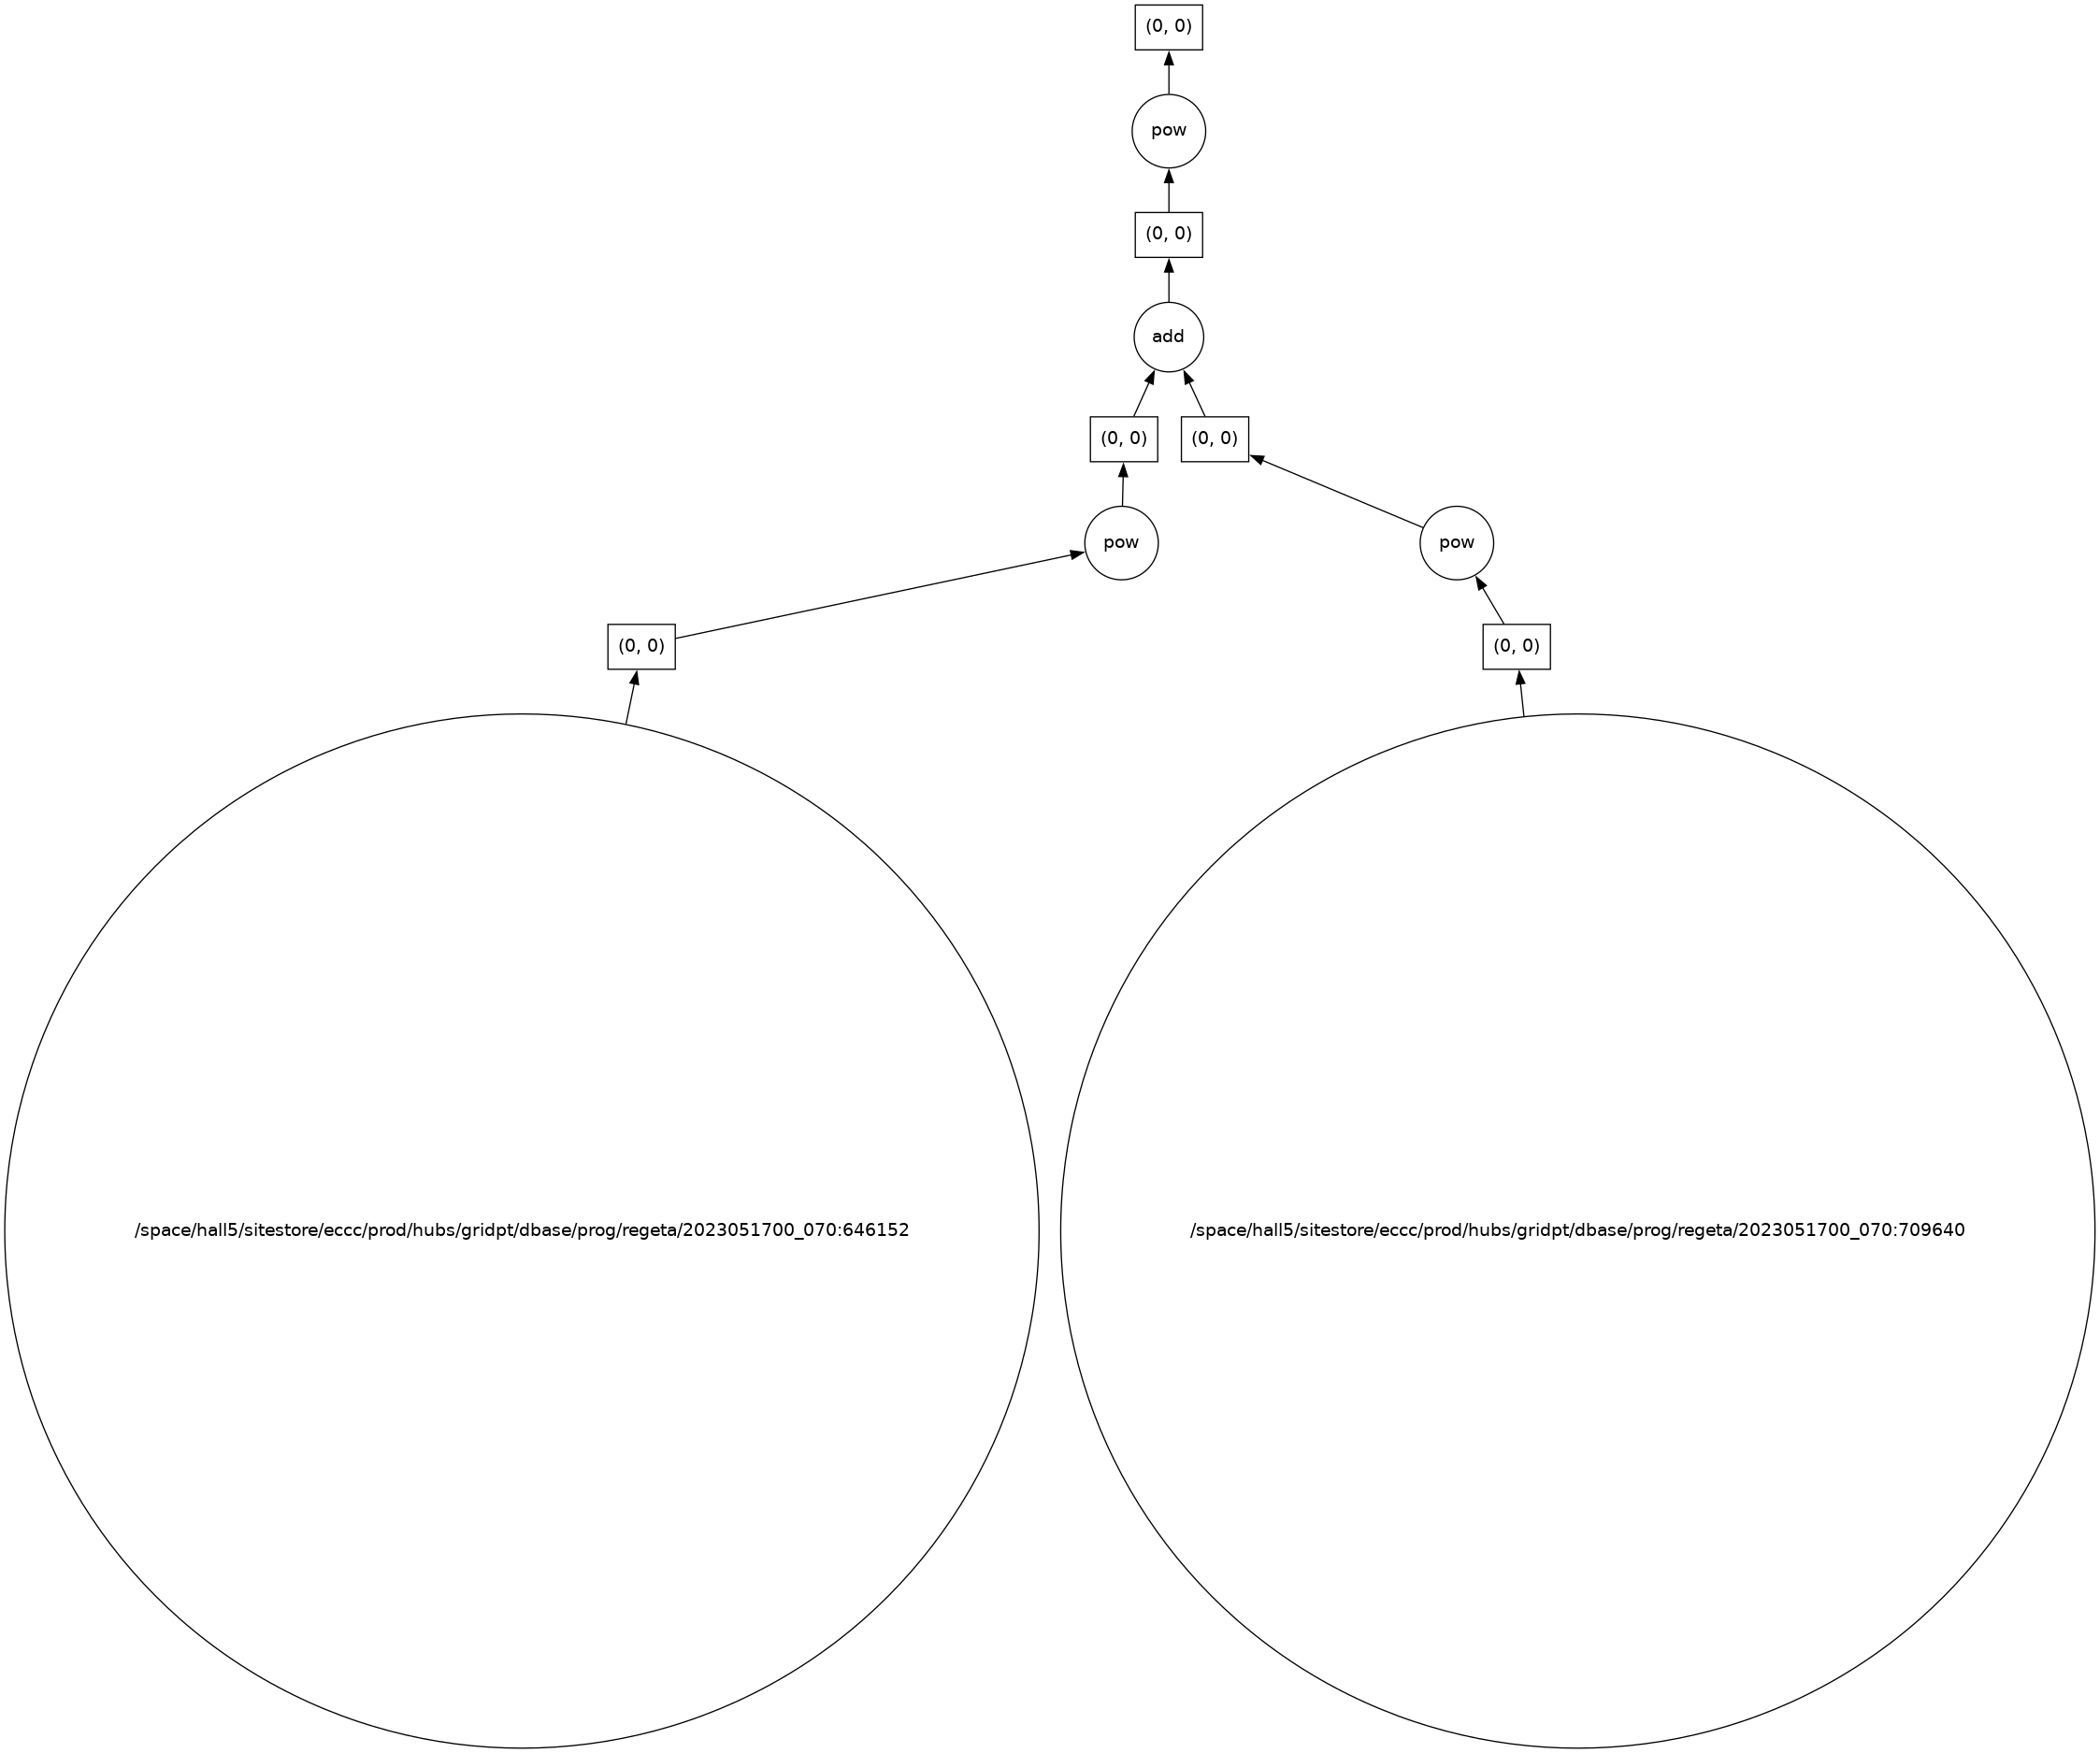

In [36]:
uv_df.iloc[0]['d'].visualize()

In [37]:
print('UV\n',uv_df.iloc[0]['d'].compute())

Read(993) UU   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
Read(993) VV   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
UV
 [[14.02692    14.078005   14.056428   ... 12.057453   12.062942
  12.123115  ]
 [14.1413145  14.118276   14.105667   ... 12.051607   12.032641
  12.104635  ]
 [14.118949   14.093705   14.083107   ... 11.791324   11.767568
  11.8702135 ]
 ...
 [ 0.6720721   0.65405643  1.116157   ...  7.0748744   7.0232234
   7.493738  ]
 [ 0.7915947   0.9405755   1.307385   ...  6.9734726   7.631992
   7.6486692 ]
 [ 1.0577049   1.328377    1.5558443  ...  7.618912    7.38389
   7.7600503 ]]


In [38]:
# internal structure of the dask array
uv_df.iloc[0]['d']

dask.array<pow, shape=(1102, 1076), dtype=float32, chunksize=(1102, 1076), chunktype=numpy.ndarray>

## Wind Chill

In [39]:
tt_df = df.loc[(df.nomvar=="TT") & (df.surface==True)]

### Create a record to hold wind chill reseult and change the nomvar

In [40]:
re_df = uv_df.copy(deep=True)
re_df['nomvar']='RE'

### The algorithm, after this re_df contains our result for the wind chill

In [41]:
tt = (tt_df.iloc[0]['d'])
uv = (uv_df.iloc[0]['d'])

In [42]:
# if (tt <= 0) & (uv >= 5) then
#    re = 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 )
# else
#    re = tt
re_df.at[0,'d'] = np.where( (tt <= 0) & (uv >= 5), 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 ), tt)
print('TT\n',tt.compute())

Read(993) TT   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
TT
 [[27.946747 27.896942 27.865692 ... 13.972137 14.028778 14.064911]
 [27.904755 27.86081  27.866669 ... 13.911591 13.998505 14.062958]
 [27.864716 27.843231 27.873505 ... 13.843231 13.952606 14.032684]
 ...
 [30.009247 29.94577  29.866669 ... 10.427216 10.151825 10.834442]
 [29.983856 29.78366  29.69577  ... 10.577606 11.056122 10.735809]
 [29.963348 29.57077  28.623505 ... 11.494598 10.401825 10.525848]]


### Visualize dask operations

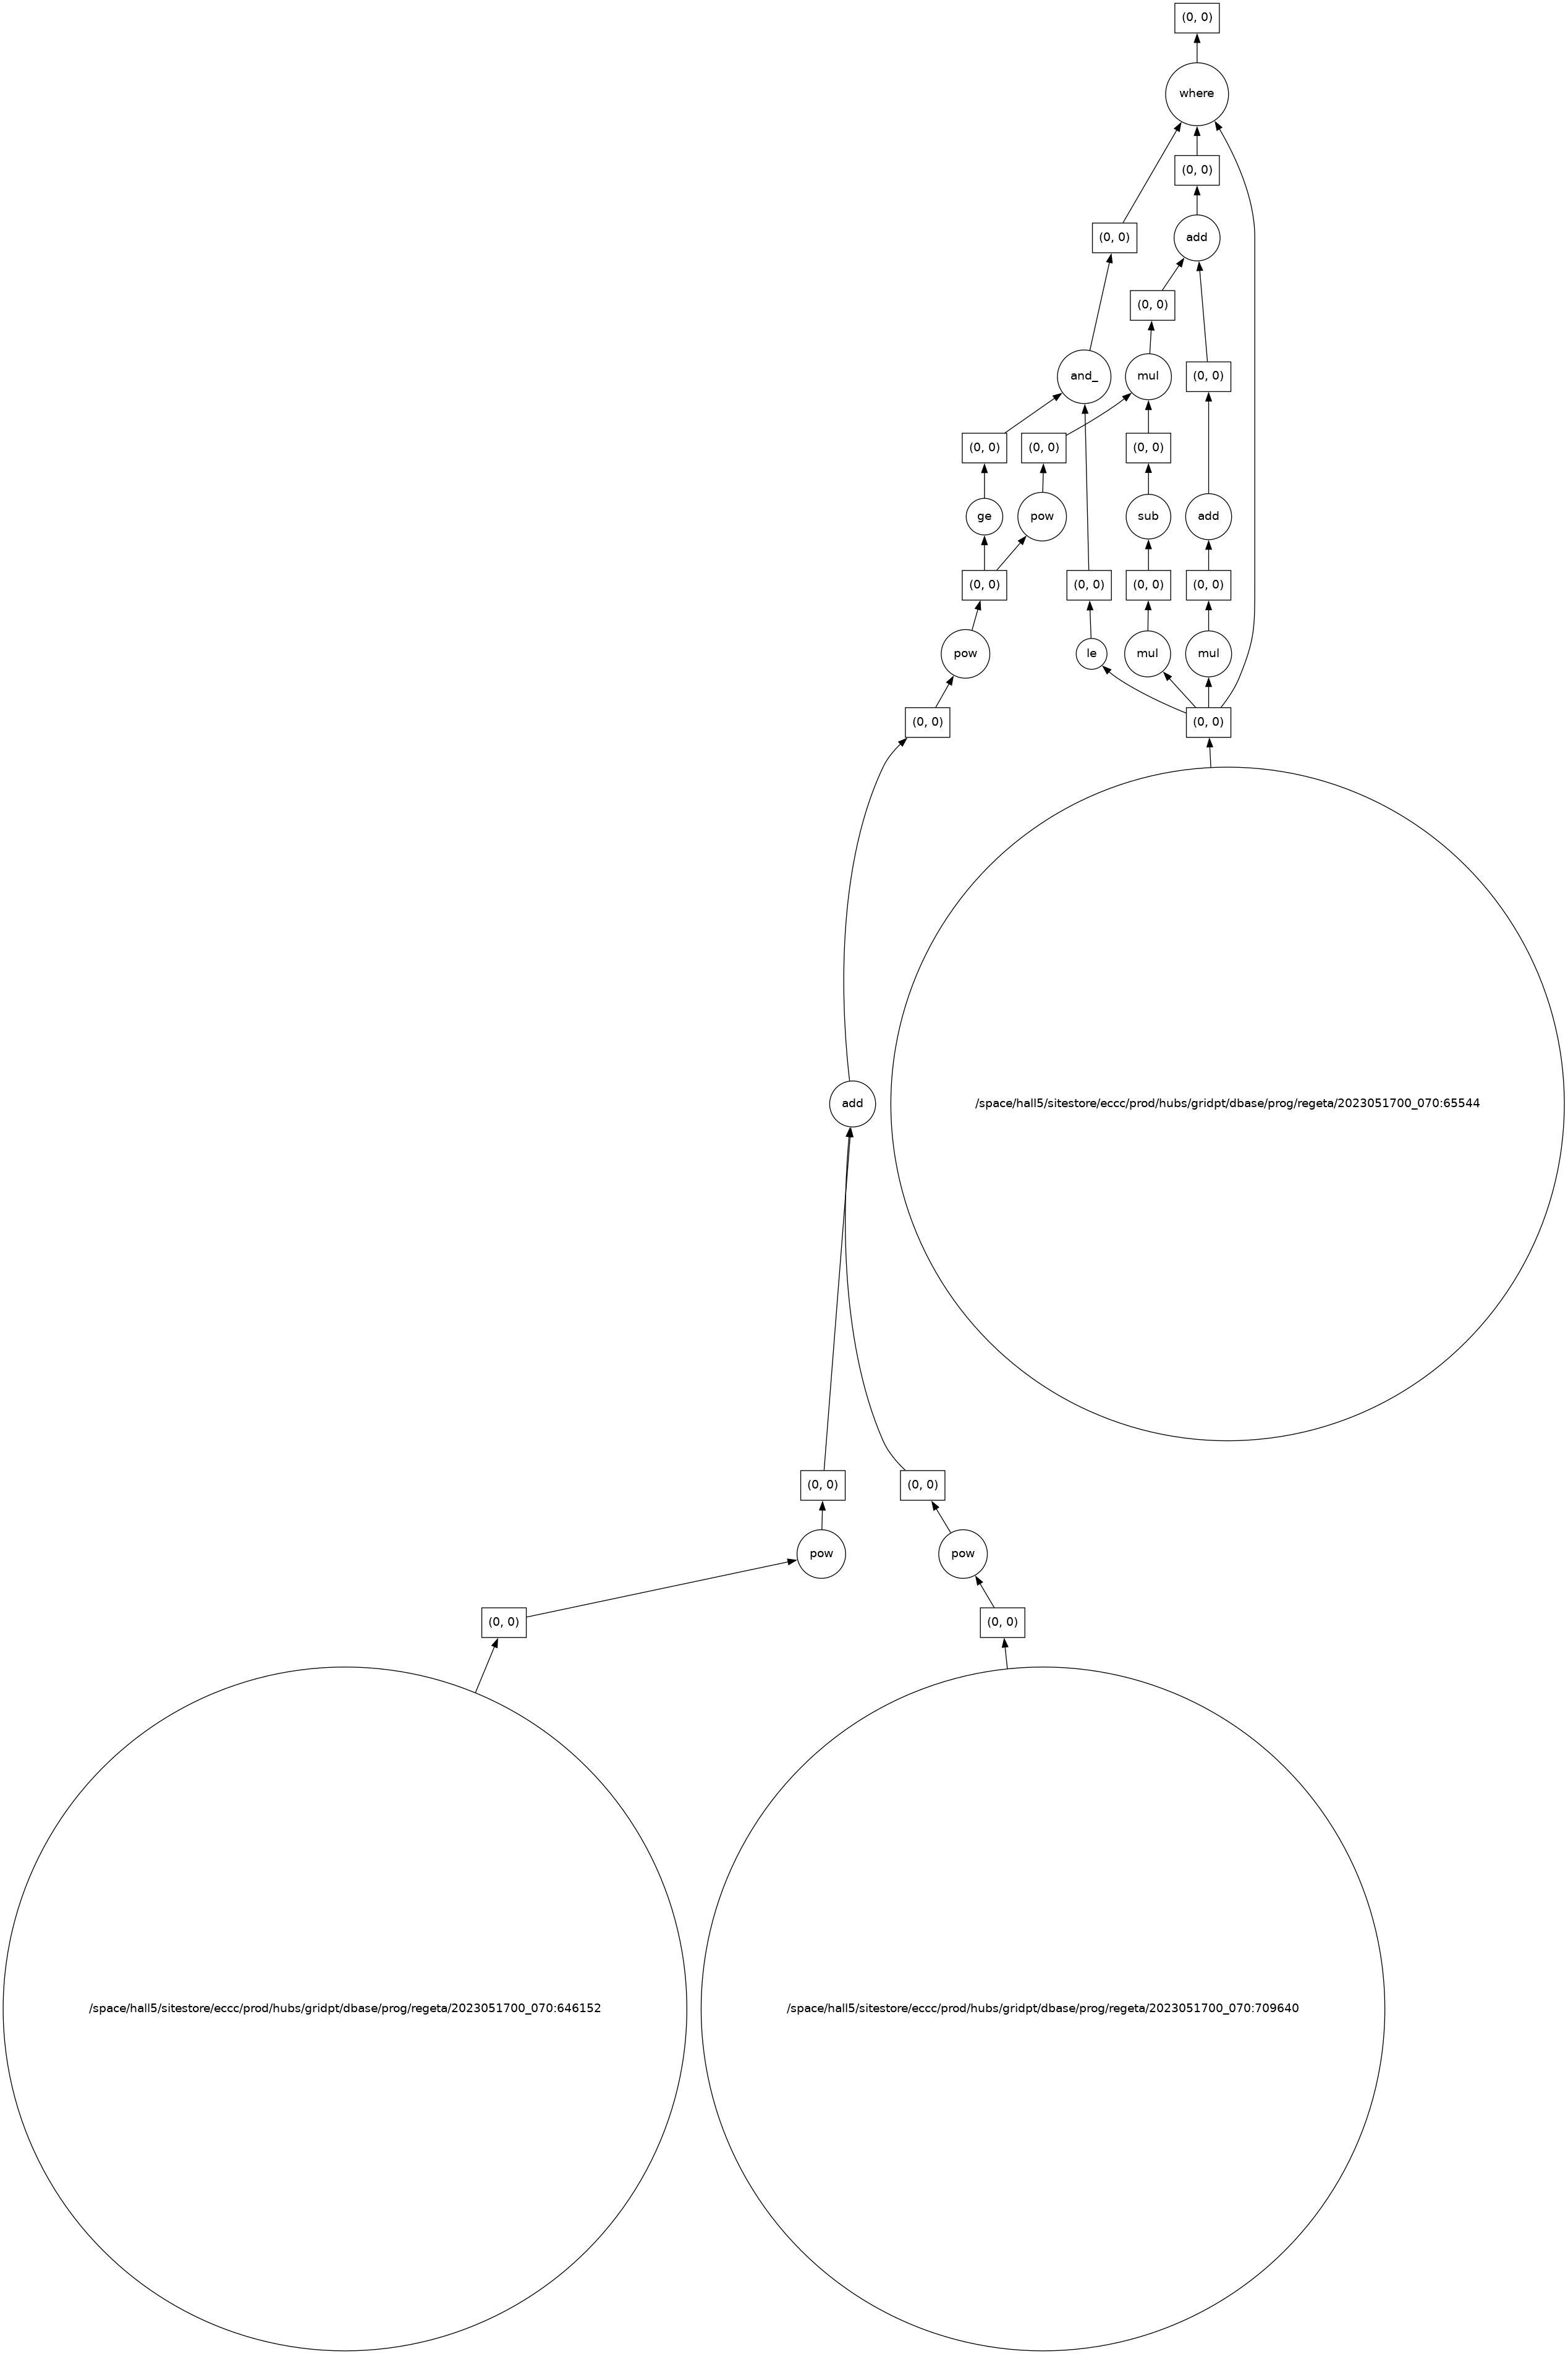

In [43]:
re_df.iloc[0]['d'].visualize()

In [44]:
print('RE\n',re_df.iloc[0]['d'].compute())

Read(993) TT   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
Read(993) UU   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
Read(993) VV   P  R1_V810_N        1102    1076     1  465387200        12000        70         0      300      840  f 16  Z 86086 77806     1     0
RE
 [[27.946747 27.896942 27.865692 ... 13.972137 14.028778 14.064911]
 [27.904755 27.86081  27.866669 ... 13.911591 13.998505 14.062958]
 [27.864716 27.843231 27.873505 ... 13.843231 13.952606 14.032684]
 ...
 [30.009247 29.94577  29.866669 ... 10.427216 10.151825 10.834442]
 [29.983856 29.78366  29.69577  ... 10.577606 11.056122 10.735809]
 [29.963348 29.57077  28.623505 ... 11.494598 10.401825 10.525848]]


## Basic statistics for TT records

### Create a function to compute statistics

In [45]:
def compute_basic_stats(df:pd.DataFrame) -> pd.DataFrame:
    """ compute for each row in a datarfame, min, max, mean, standard_deviation and the 2d indice of min and max

    :param df: input dataframe
    :type df: pd.DataFrame
    :return: output dataframe with extra columns
    :rtype: pd.DataFrame
    """
    df = fstpy.compute(df)
    df['min']=None
    df['max']=None
    df['mean']=None
    df['std']=None
    df['min_pos']=None
    df['max_pos']=None
    for i in df.index:
        df.at[i,'mean'] = df.loc[i,'d'].mean()
        df.at[i,'std'] = df.loc[i,'d'].std()
        df.at[i,'min'] = df.loc[i,'d'].min()
        df.at[i,'max'] = df.loc[i,'d'].max()
        # index (i,j) of min in record
        df.at[i,'min_pos'] = np.unravel_index(df.at[i,'d'].argmin(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'min_pos'] = (df.at[i,'min_pos'][0] + 1, df.at[i,'min_pos'][1]+1)
        # index (i,j) of max in record
        df.at[i,'max_pos'] = np.unravel_index(df.at[i,'d'].argmax(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'max_pos'] = (df.at[i,'max_pos'][0] + 1, df.at[i,'max_pos'][1]+1)
    return df

In [46]:
new_df = compute_basic_stats(tt_df)
new_df

Read(999) TT   P  R1_V810_N        1102    1076     1  465387200        12000         1         0      300       12  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200        12000         2         0      300       24  f 16  Z 86086 77806     1     0
Read(997) TT   P  R1_V810_N        1102    1076     1  465387200        12000         5         0      300       60  f 16  Z 86086 77806     1     0
Read(996) TT   P  R1_V810_N        1102    1076     1  465387200        12000         9         0      300      108  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200        12000        10         0      300      120  f 16  Z 86086 77806     1     0
Read(994) TT   P  R1_V810_N        1102    1076     1  465387200        12000        12         0      300      144  f 16  Z 86086 77806     1     0
Read(993) TT   P  R1_V810_N        1102    1076     1  465387200        12000        19         0      300

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,unit_converted,bounded,missing_data,ensemble_extra_info,min,max,mean,std,min_pos,max_pos
61,TT,P,R1_V810_N,1102,1076,1,465387200,12000,70,0,...,False,False,False,False,-21.51712,41.211395,12.504488,12.518337,"(718, 801)","(467, 342)"
1116,TT,P,R1_V810_N,1102,1076,1,465387200,12000,10,0,...,False,False,False,False,-32.897881,30.921455,10.230264,12.327315,"(834, 785)","(663, 60)"
2171,TT,P,R1_V810_N,1102,1076,1,465387200,12000,65,0,...,False,False,False,False,-20.724293,39.130199,11.935693,12.324576,"(725, 807)","(730, 47)"
3226,TT,P,R1_V810_N,1102,1076,1,465387200,12000,40,0,...,False,False,False,False,-23.125076,36.420822,11.51078,12.263508,"(810, 803)","(1022, 69)"
4281,TT,P,R1_V810_N,1102,1076,1,465387200,12000,63,0,...,False,False,False,False,-21.247292,35.848412,11.398971,12.038818,"(717, 801)","(731, 47)"
5336,TT,P,R1_V810_N,1102,1076,1,465387200,12000,57,0,...,False,False,False,False,-26.908234,31.004852,10.655874,11.868991,"(825, 806)","(675, 56)"
6391,TT,P,R1_V810_N,1102,1076,1,465387200,12000,50,0,...,False,False,False,False,-27.535988,38.202293,11.726358,12.177546,"(842, 795)","(467, 343)"
7446,TT,P,R1_V810_N,1102,1076,1,465387200,12000,84,0,...,False,False,False,False,-23.465395,31.524839,10.86482,11.848991,"(727, 809)","(692, 40)"
8501,TT,P,R1_V810_N,1102,1076,1,465387200,12000,9,0,...,False,False,False,False,-33.781609,31.060188,10.32528,12.357447,"(834, 785)","(661, 61)"
9556,TT,P,R1_V810_N,1102,1076,1,465387200,12000,67,0,...,False,False,False,False,-20.688202,40.442657,12.290917,12.519783,"(725, 807)","(674, 73)"


## Basic statistics for each column of 3d matrix

In [47]:
tt3d_df = df.loc[(df.nomvar=='TT') & (df.ip2==np.sort(df.ip2.unique())[0])].reset_index(drop=True)
# sort by level and reset index
tt3d_df = tt3d_df.sort_values(by='level',ascending=tt3d_df.iloc[0]['ascending']).reset_index(drop=True)
tt3d_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V810_N,1102,1076,1,465387200,12000,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
1,TT,P,R1_V810_N,1102,1076,1,465387200,11975,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
2,TT,P,R1_V810_N,1102,1076,1,465387200,11950,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
3,TT,P,R1_V810_N,1102,1076,1,465387200,11900,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
4,TT,P,R1_V810_N,1102,1076,1,465387200,11850,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,TT,P,R1_V810_N,1102,1076,1,465387200,2508,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
58,TT,P,R1_V810_N,1102,1076,1,465387200,2374,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
59,TT,P,R1_V810_N,1102,1076,1,465387200,2233,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False
60,TT,P,R1_V810_N,1102,1076,1,465387200,2102,1,0,...,None,ETA_1002,False,False,False,False,False,False,False,False


### Create containers for our results

In [48]:
# creates a 1 row dataframe based on a model dataframe
def create_result_df(df:pd.DataFrame, nomvar:str, operation_name:str) ->  pd.DataFrame:
   res_df = pd.DataFrame([df.iloc[0].to_dict()])
   res_df['nomvar']=nomvar
   res_df['etiket']=operation_name
   return res_df

min_df = create_result_df(tt_df,'MIN','MINIMUM')
max_df = create_result_df(tt_df,'MAX','MAXIMUM')
std_df = create_result_df(tt_df,'STD','STDDEV')
mean_df = create_result_df(tt_df,'MEAN','AVERAGE')

### Assign resulting arrays to the dataframes

In [59]:
tt_d = da.stack(tt3d_df.d).compute()
tt_min = tt_d.min(axis=0)
tt_max = tt_d.max(axis=0)
tt_std = tt_d.std(axis=0)
tt_mean = tt_d.mean(axis=0)

# # .at gets the row at index in a dataframe, we have 1 row dataframes in each case and our arrays are simple 2d result arrays 
min_df.at[0,'d'] = tt_min
max_df.at[0,'d'] = tt_max
std_df.at[0,'d'] = tt_std
mean_df.at[0,'d'] = tt_mean

Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         2795         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         2852         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         2897         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         2941         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         2990         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         3044         1         0      300       12  f 16  Z 86086 77806     1     0
Read(995) TT   P  R1_V810_N        1102    1076     1  465387200         3104         1         0      300

### Combine all results into a single dataframe

In [50]:
res_df = pd.concat([min_df,max_df,std_df,mean_df],ignore_index=True)
res_df[['nomvar','etiket','d']]

,nomvar,etiket,d
0,MIN,MINIMUM,"[[-80.774055, -80.85218, -80.91663, -80.96644,..."
1,MAX,MAXIMUM,"[[28.039486, 28.100033, 28.158627, 28.189877, ..."
2,STD,STDDEV,"[[39.76925, 39.78811, 39.80262, 39.813347, 39...."
3,MEAN,AVERAGE,"[[-21.029501, -21.020023, -21.01327, -21.00820..."


# Grouping data

## Grouping data by grid, the usual case when you have multiple grids in a dataframe

In [51]:
grid_groups = df.groupby(by=['grid'])

for grid,grid_df in grid_groups:
    print(f'grid: {grid}')
    print(grid_df[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
0         TT  R1_V810_N  1102  1076   1  465387200  2000   70    0
1         TT  R1_V810_N  1102  1076   1  465387200  2102   70    0
2         TT  R1_V810_N  1102  1076   1  465387200  2233   70    0
3         TT  R1_V810_N  1102  1076   1  465387200  2374   70    0
4         TT  R1_V810_N  1102  1076   1  465387200  2508   70    0
...      ...        ...   ...   ...  ..        ...   ...  ...  ...
32263     PT  R1_V810_N  1102  1076   1  465387200     0    2    0
32266     P0  R1_V810_N  1102  1076   1  465387200     0   55    0
32267     PT  R1_V810_N  1102  1076   1  465387200     0   55    0
32274     P0  R1_V810_N  1102  1076   1  465387200     0   47    0
32275     PT  R1_V810_N  1102  1076   1  465387200     0   47    0

[32198 rows x 9 columns]


/tmp/sbf000/568834/ipykernel_1341374/2958624811.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for grid,grid_df in grid_groups:


## Grouping data by forecast hour, the usual case when you have multiple forecast hours per grid in a dataframe

In [52]:
forecast_hour_groups = df.loc[df.nomvar=='TT'].groupby(by=['grid','forecast_hour'])

for (grid,fhour),forecast_hour_df in forecast_hour_groups:
    print(f'grid: {grid} forecast_hour: {fhour}')
    print(forecast_hour_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 forecast_hour: 0 days 01:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
15825     TT  R1_V810_N  1102  1076   1  465387200  2000    1    0
15826     TT  R1_V810_N  1102  1076   1  465387200  2102    1    0
grid: 8608677806 forecast_hour: 0 days 02:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
24265     TT  R1_V810_N  1102  1076   1  465387200  2000    2    0
24266     TT  R1_V810_N  1102  1076   1  465387200  2102    2    0
grid: 8608677806 forecast_hour: 0 days 05:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
12660     TT  R1_V810_N  1102  1076   1  465387200  2000    5    0
12661     TT  R1_V810_N  1102  1076   1  465387200  2102    5    0
grid: 8608677806 forecast_hour: 0 days 09:00:00
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
8440     TT  R1_V810_N  1102  1076   1  465387200  2000    9    0
8441     TT  R1_V810_N  1102  1076   1  465387200  2102    9    0
grid: 8

## Grouping data by level, the usual case when you have multiple levels per grid in a dataframe

In [53]:
levels_groups = df.loc[df.nomvar=='UU'].groupby(by=['grid','level'])

for (grid,level),level_df in levels_groups:
    print(f'grid: {grid} level: {level}')
    print(level_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 level: 0.0
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
310      UU  R1_V810_N  1102  1076   1  465387200  2000   70    0
1365     UU  R1_V810_N  1102  1076   1  465387200  2000   10    0
grid: 8608677806 level: 0.010200000368058681
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
311      UU  R1_V810_N  1102  1076   1  465387200  2102   70    0
1366     UU  R1_V810_N  1102  1076   1  465387200  2102   10    0
grid: 8608677806 level: 0.02329999953508377
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
312      UU  R1_V810_N  1102  1076   1  465387200  2233   70    0
1367     UU  R1_V810_N  1102  1076   1  465387200  2233   10    0
grid: 8608677806 level: 0.03739999979734421
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
313      UU  R1_V810_N  1102  1076   1  465387200  2374   70    0
1368     UU  R1_V810_N  1102  1076   1  465387200  2374   10    0
grid: 8608677806 level: 0.05079999938607216
   

# Exporting the data

## To standardfile 

In [54]:
from os import getenv
import fstpy
df = fstpy.StandardFileReader('/fs/site5/eccc/cmd/w/spst900/spooki/spooki_dir/pluginsRelatedStuff/ReaderStd_WriterStd/testsFiles/source_data_5005.std').to_pandas()
tt_df = df.loc[df.nomvar=='TT']
user = getenv("USER")
file = f'/tmp/{user}/TT.std'
fstpy.delete_file(file)
fstpy.StandardFileWriter(file, tt_df).to_fst()

Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300       72  f 16  Z 33792 77761     1     0
Read(994) TT   P  R1_V710_N        1108    1082     1  442998800     95294295         6         0      300

### Check the file

In [55]:
df = fstpy.StandardFileReader(file).to_pandas()
cols = list(df.columns)
cols.remove('d')
df[cols]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761


## To pickle

In [56]:
pickle_file = f'/home/{user}/pickle_data.pkl.bz2'
fstpy.delete_file(pickle_file)
df.to_pickle(pickle_file)

### Check the file

In [57]:
df = pd.read_pickle(pickle_file)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."


In [58]:
df = fstpy.compute(df)
df

Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     76696048         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95178882         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95154915         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     95529009         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     97351772         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     96219256         6         0      300       72  f 16  Z 33792 77761     1     0
Read(993) TT   P  R1_V710_N        1108    1082     1  442998800     96158008         6         0      300

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[26.068878, 26.084503, 26.108917, 26.167511, ..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.86026, 15.958893, 16.014557, 16.121979, 1..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[14.96785, 15.049881, 15.1201935, 15.15535, 1..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-43.06671, -43.033997, -43.00226, -42.972473..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-41.939545, -41.942474, -41.94687, -41.95077..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-6.3888702, -6.367386, -6.3507843, -6.339065..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-27.158905, -27.167206, -27.174042, -27.1794..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-36.064682, -36.0598, -36.051987, -36.041733..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.487396, 15.331146, 14.937592, 14.422943, ..."
